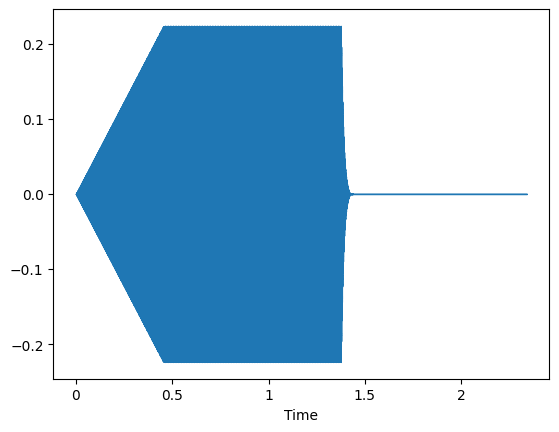

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lr
from pathlib import Path
from scipy.ndimage import uniform_filter1d
import IPython.display as ipd

# Import samples
samples = [lr.load(p)[0] for p in Path().glob('../data/Ableton/*.wav')]
sr = [lr.load(p)[1] for p in Path().glob('../data/Ableton/*.wav')]

lr.display.waveshow(samples[0])

In [60]:
hop_length = 100  # Number of samples between each frame
frame_length = 500  # Frame size in samples
for sample in samples:
    rms = lr.feature.rms(y=sample, frame_length=frame_length, hop_length=hop_length)[0]

    times = lr.times_like(rms, sr=sr[0], hop_length=hop_length)

    rms_diff = np.diff(rms)
    # print(rms_diff)
    # Set a threshold for the derivative to detect a sharp rise (attack)
    attack_threshold = 0.002# Adjust based on your sound
    attack_start = np.where(rms_diff > attack_threshold)[0][0]  # First large rise
    attack_time = times[attack_start]
    print(attack_start)

31
0
130
0
0
90
0
1
0
232
0
0
0
0
0
0


IndexError: index 0 is out of bounds for axis 0 with size 0